In [1]:
import spotipy
import spotipy.util as util
import pandas as pd
import os
import time
import requests
from bs4 import BeautifulSoup as bs
import datetime
from datetime import timedelta, date
import glob
from os import listdir
import numpy as np
import pymongo
import csv
import json
import sys, getopt, pprint
from pymongo import MongoClient
import types
import itertools
from itertools import zip_longest
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as snsfrom sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [4]:
DaveDF = pd.read_csv('DaveDF.csv')
VladDF = pd.read_csv('VLAD_DF.csv')
KevDF = pd.read_csv('KevDF.csv')
StephenDF = pd.read_csv('StephenDF.csv')
WhitePandas = pd.read_csv('WhitePandas.csv')
DaveDF_means = pd.read_csv('Dave_means.csv')
VladDF_means = pd.read_csv('Vlad_means.csv')
KevDF_means = pd.read_csv('Kev_means.csv')
StephenDF_means = pd.read_csv('Stephen_means.csv')
WhitePandas_mean = pd.read_csv('WhitePandas_means.csv')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


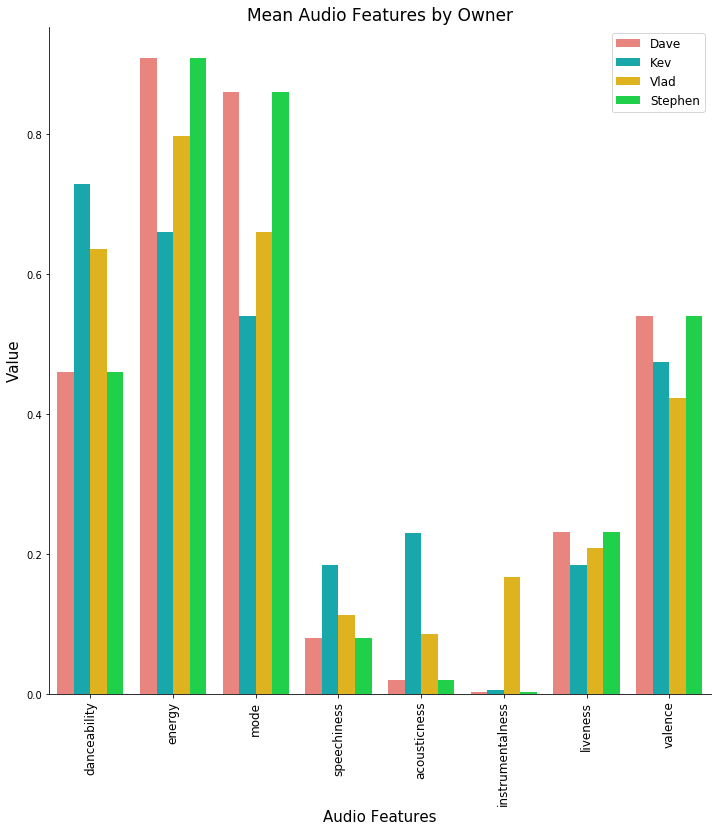

In [6]:
bright=["#F8766D","#00BFC4","#FFC400","#03ED3A","#003FFF","#8A2BE2"]
sns.set_palette(bright)

#plot mean audio features by owner
new = WhitePandas_mean.melt('owner', var_name='cols',  value_name='vals')
sns.factorplot(x="cols", y="vals", hue='owner', data=new, kind='bar', size=10, legend_out=False)
plt.xticks(rotation = 90, fontsize = 12) #set audio feature labels
plt.ylabel("Value", fontsize = 15) #set y axis label
plt.xlabel("Audio Features", fontsize = 15) #set x axis label
plt.title("Mean Audio Features by Owner", fontsize = 17) #set chart title
plt.legend(fontsize=12) #increase legend fontsize
plt.show() #remove text output

In [7]:
#####Separate Training Set into Train and Test Sets
#separate the dataset into two separate sets to train and test the model
train = pd.read_csv("WhitePandas.csv")
features = train.drop(['Owner','Track ID','Tracks','Artists'], axis=1)
target = train['Owner']

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size= 0.15)
print('Features Training Set:', x_train.shape, 'Features Testing Set:', x_test.shape)
print('Target Training Set:', y_train.shape, 'Target Testing Set:', y_test.shape)

Features Training Set: (170, 12) Features Testing Set: (30, 12)
Target Training Set: (170,) Target Testing Set: (30,)


In [9]:
#Random Forest
randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)
acc_randomforest = accuracy_score(y_pred, y_test) * 100
print("Random Forest:", acc_randomforest)

ValueError: could not convert string to float: 'New Found Glory'

In [ ]:
param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_cv = GridSearchCV(estimator=randomforest, param_grid=param_grid)
rf_cv.fit(x_train, y_train)

print(rf_cv.best_params_)

y_pred = rf_cv.predict(x_test)
acc_rfcv = accuracy_score(y_pred, y_test)*100
print("Random Forest GridSearchCV:", acc_rfcv)

In [ ]:
#testdf = pd.read_csv("csv")
#owners = ['Vlad','Kevin','Dave','Stephen', 'etc','Nadin','Nadin','Can','Can','Can','Can','Can','Can','Can']
#prediction = rf_cv.predict(testdf)
#accuracy = accuracy_score(prediction, owners)
#print("Correct Predictions: %d/%d"%(accuracy*len(owners),len(owners)))
#print("Accuracy: %.2f%%"%(accuracy*100))